In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
# Read APP and river level csv files
APP165 = pd.read_csv('APP0165.csv', delimiter = ',')
river = pd.read_csv('river_level.csv', delimiter = ',')

In [3]:
# Combine the date and time columns in APP165
APP165.insert(2, 'date_time', APP165['date'] + ' ' + APP165['time'])

In [4]:
# Make Python recognize the date_time column as a datetime object in APP165
APP165['date_time']=pd.to_datetime(APP165['date_time'], format = '%d/%m/%Y %I:%M:%S %p')

In [5]:
# Remove date and time columns in APP165
APP165_1 = APP165.drop(["date", "time"], axis=1)

In [6]:
# Make Python recognize the date_time column as a datetime object in river
river['date_time']=pd.to_datetime(river['date_time'], format = '%d/%m/%Y %H:%M:%S')

In [7]:
# Merge APP and river data based on date_time
df = APP165_1.merge(river, how = 'outer', left_on = 'date_time', right_on = 'date_time', suffixes = ('_GW', '_river'))

In [8]:
# Remove rows that have 'NaN'
df2 = df.dropna()

In [9]:
# Separating individual columns
GWL = df2.drop(['date_time', 'temp', 'level_river'], axis=1)
River_level = df2.drop(['date_time', 'temp', 'level_GW'], axis=1)
Temp = df2.drop(['date_time', 'level_river', 'level_GW'], axis=1)
Date_time = df2.drop(['temp', 'level_river', 'level_GW'], axis=1)

In [10]:
# Exporting dataframe to csv
GWL.to_csv(r'C:\Users\setiawai\OneDrive - Lincoln University\PhD\Data\APP_dataset\APP165_trial\GWL.csv')
River_level.to_csv(r'C:\Users\setiawai\OneDrive - Lincoln University\PhD\Data\APP_dataset\APP165_trial\River_level.csv')
Temp.to_csv(r'C:\Users\setiawai\OneDrive - Lincoln University\PhD\Data\APP_dataset\APP165_trial\Temp.csv')

In [11]:
# Define variables for cross-correlation
GWL_a = np.genfromtxt('GWL.csv', delimiter = ',', skip_header = 1)
RL_a = np.genfromtxt('River_level2.csv', delimiter = ',', skip_header = 1)
Temp_a = np.genfromtxt('Temp.csv', delimiter = ',', skip_header = 1)

In [12]:
# Define lag time; N = number of points; each number of points differ by 30 min
N = 18911
lags = np.arange(- N + 1, N)

x = np.linspace(0, 18911, N) # Generates 18911 evenly spaced numbers between 0 and 18911

# Cross covariance function for GWL and river level
ccov = np.correlate(GWL_a - GWL_a.mean(), RL_a - RL_a.mean(), mode = 'full')
ccor = ccov / (N * GWL_a.std() * RL_a.std())

In [25]:
df2.head()

,date_time,level_GW,temp,level_river
2,2016-09-19 14:30:00,0.7237,12.134,-0.151
5,2016-09-19 15:00:00,0.7422,12.041,-0.177
8,2016-09-19 15:30:00,0.7578,12.012,-0.169
11,2016-09-19 16:00:00,0.7558,12.093,-0.048
14,2016-09-19 16:30:00,0.7396,12.169,0.116


(-100, 100)

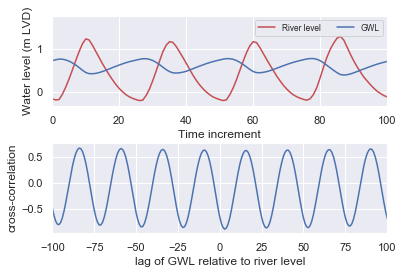

In [21]:
# plotting graph
fig, axs = plt.subplots(2) # Number of subplots is 2
fig.subplots_adjust(hspace = 0.4) # hspace is the amount of height reserved for space between subplots, expressed as a fraction of the average axis height

ax = axs[0] # First subplot
ax.plot(x, RL_a, 'r', label = 'River level') # Second series in subplot. 'r' for red
ax.plot(x, GWL_a, 'b', label = 'GWL') # First series in subplot. 'b' for blue
ax.legend(loc = 'upper right', fontsize ='small', ncol = 2)
ax.set_ylabel('Water level (m LVD)')
ax.set_xlabel('Time increment')
ax.set_xlim(0, 100)

ax = axs[1] # Second subplot
ax.plot(lags, ccor)
ax.set_ylabel('cross-correlation')
ax.set_xlabel('lag of GWL relative to river level')
ax.set_xlim(-100, 100)

In [14]:
maxlag = lags[np.argmax(ccor)] # Maximum of ccor is the maximum correlation at certain lag time
print("max correlation is at lag %d" % maxlag)
# negative lag means that the second series (GWL) lags the first (River level), which is what we'd expect.

max correlation is at lag -208


In [15]:
ccor.max()

0.6913969252043248

In [16]:
ccor.min()

-0.8934402920316773

In [17]:
minlag = lags[np.argmin(ccor)] # Maximum of ccor is the maximum correlation at certain lag time
print("min correlation is at lag %d" % minlag)

min correlation is at lag 3


In [18]:
maxlag = lags[np.argmax(ccor)] # Maximum of ccor is the maximum correlation at certain lag time
print("max correlation is at lag %d" % maxlag)

max correlation is at lag -208
